SiLU、Softplus 和 ReLU 是神經網路中常用的激活函數，以下是它們的比較，涵蓋定義、數學表達式、特性、優缺點及應用場景：

---

### 1. ReLU (Rectified Linear Unit)
- **定義**: 將負輸入設為 0，正輸入保持不變。
- **數學表達式**: 
  $$ f(x) = \max(0, x) $$
- **特性**:
  - 非線性，但在 $x > 0$ 時為線性。
  - 導數簡單：$x > 0$ 時導數為 1，$x < 0$ 時導數為 0（$x = 0$ 處不可導）。
  - 輸出範圍：$[0, \infty)$。
- **優點**:
  - 計算簡單，速度快，適合深度網路。
  - 促進稀疏性（負輸入輸出為 0），減少過擬合風險。
  - 解決部分梯度消失問題（在 $x > 0$ 時梯度為 1）。
- **缺點**:
  - **Dying ReLU 問題**：負輸入的梯度為 0，可能導致神經元「死亡」（永遠輸出 0）。
  - 在 $x = 0$ 處不可導，可能影響某些優化算法。
- **應用場景**:
  - 廣泛用於卷積神經網路 (CNN) 和深度前饋網路，特別是計算效率要求高的場景。
  - 適合正值輸出有意義的任務。

---

### 2. Softplus
- **定義**: ReLU 的平滑近似，輸出始終正且平滑可導。
- **數學表達式**: 
  $$ f(x) = \ln(1 + e^x) $$
- **特性**:
  - 平滑、非線性，輸出範圍：$(0, \infty)$。
  - 導數：$$ f'(x) = \frac{1}{1 + e^{-x}} $$（即 Sigmoid 函數）。
  - 當 $x \to \infty$ 時，$f(x) \approx x$；當 $x \to -\infty$ 時，$f(x) \to 0$。
- **優點**:
  - 平滑可導，適合需要嚴格連續導數的優化算法。
  - 比 ReLU 更「柔和」，減少梯度突變。
- **缺點**:
  - 計算複雜度高（涉及指數和對數運算）。
  - 梯度在 $x$ 很大或很小時接近 0，可能導致梯度消失。
- **應用場景**:
  - 用於需要平滑激活函數的場景，如某些生成模型或梯度要求嚴格的任務。
  - 較少用於大型深度網路，因計算成本高。

---

### 3. SiLU (Sigmoid Linear Unit)
- **定義**: 結合 Sigmoid 和線性函數，輸出為輸入與 Sigmoid 的乘積。
- **數學表達式**: 
  $$ f(x) = x \cdot \sigma(x) = \frac{x}{1 + e^{-x}} $$
  （其中 $\sigma(x) = \frac{1}{1 + e^{-x}}$ 是 Sigmoid 函數）
- **特性**:
  - 平滑、非線性，輸出範圍：$(-\infty, \infty)$（但負值幅度較小）。
  - 導數：$$ f'(x) = \sigma(x) + x \cdot \sigma(x)(1 - \sigma(x)) $$。
  - 當 $x \to \infty$ 時，$f(x) \approx x$；當 $x \to -\infty$ 時，$f(x) \to 0$。
  - SiLU 是 Softplus 的導數的加權形式，與 Softplus 有密切關係。
- **優點**:
  - 平滑可導，適合梯度優化。
  - 允許負值輸出，增強模型表達能力（不像 ReLU 僅輸出非負）。
  - 比 Softplus 更具線性特性，訓練時表現更穩定。
- **缺點**:
  - 計算成本高於 ReLU（涉及指數運算）。
  - 負值輸出幅度小，可能限制某些場景的表達力。
- **應用場景**:
  - 常用於現代深度學習模型，如 Transformer 和 Swin Transformer。
  - 適合需要平滑且允許負輸出的任務。

---

### 比較總結
| 特性/函數 | ReLU | Softplus | SiLU |
|-----------|------|----------|------|
| **表達式** | $\max(0, x)$ | $\ln(1 + e^x)$ | $x \cdot \frac{1}{1 + e^{-x}}$ |
| **輸出範圍** | $[0, \infty)$ | $(0, \infty)$ | $(-\infty, \infty)$ |
| **平滑性** | 非平滑（$x=0$ 不可導） | 平滑 | 平滑 |
| **計算複雜度** | 低 | 高 | 中等 |
| **梯度消失風險** | 無（正輸入） | 有（大/小輸入） | 較小 |
| **負值輸出** | 無 | 無 | 有（但幅度小） |
| **主要問題** | Dying ReLU | 計算成本高 | 計算成本較高 |
| **典型應用** | CNN、深度網路 | 生成模型 | Transformer、現代模型 |

---

### 選擇建議
- **ReLU**: 當計算效率和簡單性優先，且模型對稀疏性有需求時首選（如 CNN）。需注意 Dying ReLU 問題，可搭配 Leaky ReLU 或 Parametric ReLU 改進。
- **Softplus**: 當需要平滑激活且對梯度連續性要求高時使用，但因計算成本高，較少用於大型模型。
- **SiLU**: 平衡了 ReLU 的效率和 Softplus 的平滑性，適合現代深度學習模型（如 Transformer）。若計算資源允許，SiLU 是較佳選擇。

如果有具體應用場景或模型需求，可以進一步討論哪個更合適！

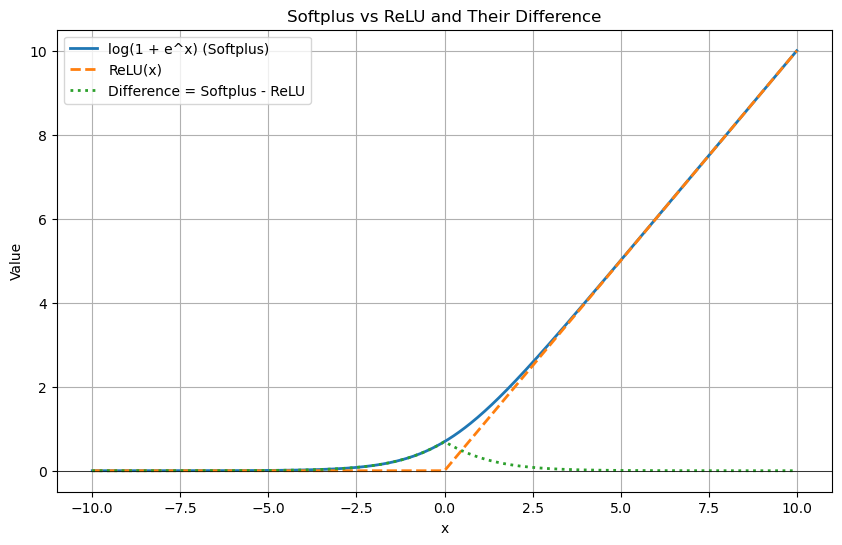

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義函數
def softplus(x):
    return np.log1p(np.exp(x))  # log(1 + e^x)

def relu(x):
    return np.maximum(0, x)

# 建立 x 座標
x = np.linspace(-10, 10, 500)

# 計算 y 值
y_softplus = softplus(x)
y_relu = relu(x)
difference = y_softplus - y_relu

# 畫圖
plt.figure(figsize=(10, 6))

# 畫出函數
plt.plot(x, y_softplus, label='log(1 + e^x) (Softplus)', linewidth=2)
plt.plot(x, y_relu, label='ReLU(x)', linestyle='--', linewidth=2)
plt.plot(x, difference, label='Difference = Softplus - ReLU', linestyle=':', linewidth=2)

# 加上圖例與標籤
plt.title('Softplus vs ReLU and Their Difference')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)

plt.show()

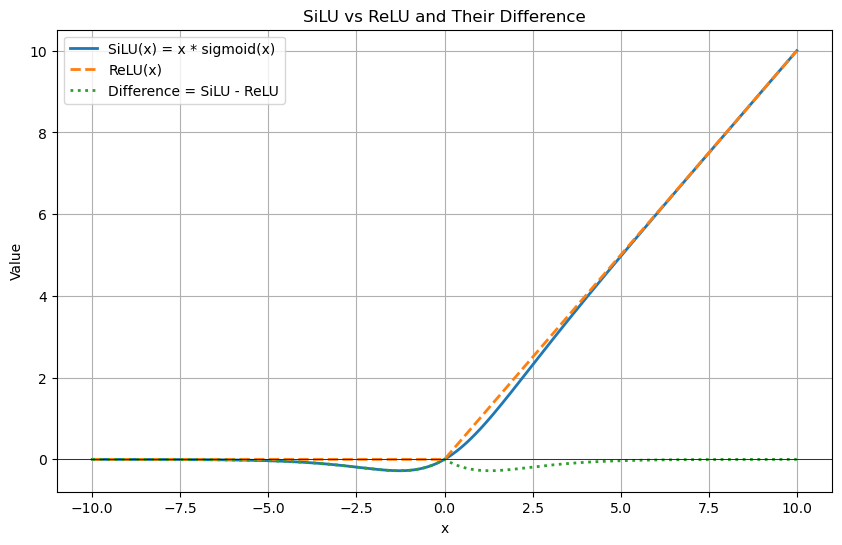

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義函數
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def silu(x):
    return x * sigmoid(x)

def relu(x):
    return np.maximum(0, x)

# 建立 x 座標
x = np.linspace(-10, 10, 500)

# 計算 y 值
y_silu = silu(x)
y_relu = relu(x)
difference = y_silu - y_relu

# 畫圖
plt.figure(figsize=(10, 6))

# 畫出函數
plt.plot(x, y_silu, label='SiLU(x) = x * sigmoid(x)', linewidth=2)
plt.plot(x, y_relu, label='ReLU(x)', linestyle='--', linewidth=2)
plt.plot(x, difference, label='Difference = SiLU - ReLU', linestyle=':', linewidth=2)

# 加上圖例與標籤
plt.title('SiLU vs ReLU and Their Difference')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)

plt.show()